In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

In [11]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [12]:
dftrain = pd.read_excel (r'C:\Users\oviya\Desktop\Data_Train.xlsx')
print (dftrain)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage 

In [14]:
missing_values = dftrain.isnull().sum()
missing_values

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [15]:
dftrain.describe()

,Year,Kilometers_Driven,Power,Seats,Price
count,6019.000000,6.019000e+03,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,560.000000,10.000000,160.000000


In [130]:
cat_val = ["Location","Year","Kilometers_Driven", "Fuel_Type","Transmission", "Owner_Type","Power","Seats"]

for col in cat_val:
    print ([col]," : ",dftrain[col].unique())


['Location']  :  [5]
['Year']  :  [2017 2015]
['Kilometers_Driven']  :  [25000  8000]
['Fuel_Type']  :  [1 4]
['Transmission']  :  [0]
['Owner_Type']  :  [0]
['Power']  :  [255.  488.1]
['Seats']  :  [5. 2.]


In [20]:
dftrain_c = dftrain.copy()
dftrain_c = dftrain_c[
    (dftrain_c["Year"].between(1945, 2019, inclusive=True)) &
    (dftrain_c["Power"].between(100, 500, inclusive=True)) &
    (dftrain_c["Price"].between(100, 200000, inclusive=True))
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F0F55E0C8>,
      dtype=object)

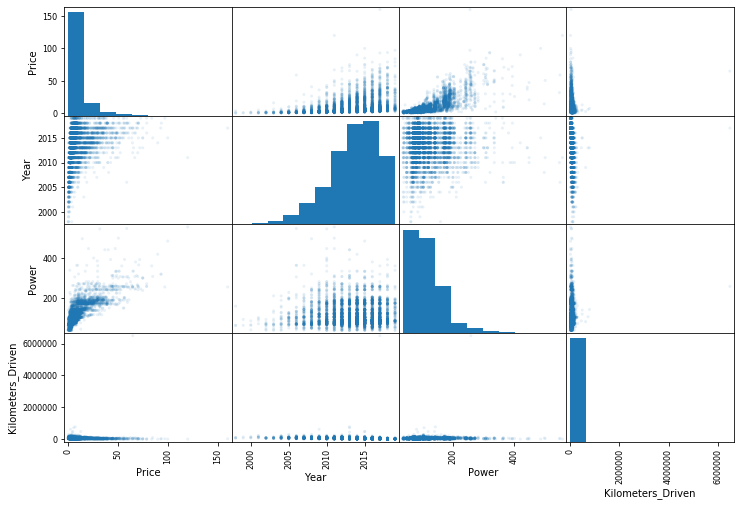

In [22]:
num_attributes = ["Price", "Year", "Power", "Kilometers_Driven"]
%matplotlib inline
pd.plotting.scatter_matrix(dftrain[num_attributes], figsize = (12,8), alpha = 0.1)

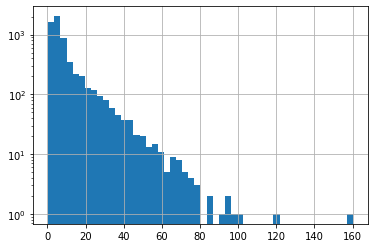

In [25]:
dftrain["Price"].hist(bins = 50, log = True)

In [28]:
print("Current Data Amount : ", dftrain.shape[0]/dftrain.shape[0] * dftrain.shape[0], 
      "\n","Current Data Amount %: ", dftrain.shape[0]/dftrain.shape[0])

Current Data Amount :  6019.0 
 Current Data Amount %:  1.0


In [62]:
# Filter bad data
dftrain_c = dftrain[
    (dftrain_c["Year"].between(1945, 2017, inclusive=True)) &
    (dftrain_c["Power"].between(100, 500, inclusive=True)) &
    (dftrain_c["Price"].between(100, 200000, inclusive=True))  
]

# Replace the NaN-Values
dftrain_c['Kilometers_Driven'].fillna(value='blank', inplace=True)
dftrain_c['Fuel_Type'].fillna(value='blank', inplace=True)
dftrain_c['Transmission'].fillna(value='blank', inplace=True)
dftrain_c['Price'].fillna(value='blank', inplace=True)
dftrain_c['Engine'].fillna(value='blank', inplace=True)

for col in dftrain:
    if dftrain[col].dtype == "object":
        dftrain[col] = dftrain[col].astype('category')

In [63]:
cat_columns = dftrain.select_dtypes(['category']).columns

dftrain[cat_columns] = dftrain[cat_columns].apply(lambda x: x.cat.codes)

In [64]:
dftrain.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,815,5,2017,25000,1,0,0,76,114,255.0,5.0,160.0
5919,774,5,2015,8000,4,0,0,48,130,488.1,2.0,100.0


In [84]:
cars_price = dftrain["Price"].copy()
dftrain= dftrain.drop("Price", axis=1)

In [33]:
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [65]:
cat_attribs = ["Kilometers_Driven", "Fuel_Type", "Owner_Type", "Price", "Power", "Mileage", "Engine"]
num_attribs = list(dftrain_c.drop(cat_attribs, axis=1))

# Building the Pipelines

num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [44]:
from sklearn.metrics import mean_squared_error

In [66]:
cars_prepared = full_pipeline.fit_transform(dftrain)

C:\Users\oviya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [85]:
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
from sklearn.metrics import mean_squared_error

In [86]:
cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_price, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [87]:
cars_predictions[0:4]

array([160., 100.])

In [88]:
list(cars_price[0:4])

[160.0, 100.0]

In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(cars_prepared, cars_price)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [90]:
cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(cars_price, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [91]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(cars_prepared, cars_price)

C:\Users\oviya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [94]:
cars_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(cars_price, cars_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

13.416407864998739

In [95]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [204]:
scores = cross_val_score(lin_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=2)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

The exact solution is  x = 0                              
The exact solution is  x = 0                              
Scores: [60. 60.]
Mean: 60.0
Standard deviation: 0.0


In [205]:
scores = cross_val_score(tree_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=2)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [60. 60.]
Mean: 60.0
Standard deviation: 0.0


In [186]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, cars_prepared, cars_price,
                         scoring="neg_mean_squared_error", cv=2)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [60. 60.]
Mean: 60.0
Standard deviation: 0.0


In [103]:
feature_importances = forest_reg.feature_importances_
feature_importances

array([0.16666667, 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.16666667, 0.16666667])

In [104]:
cat_encoder = cat_pipeline.named_steps["encoder"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ cat_encoder
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16666666666666669, 'Year'),
 (0.16666666666666669, 'Name'),
 (0.0, 'Transmission'),
 (0.0, 'Seats'),
 (0.0, 'Location')]

In [196]:
dfprice = pd.read_excel (r'C:\Users\oviya\Desktop\price_set.xlsx')
print (dfprice)

                                  Name  Year  Kilometers_Driven    Location  \
0               Maruti Wagon R LXI CNG  2010              72000      Mumbai   
1     Hyundai Creta 1.6 CRDi SX Option  2015              41000        Pune   
2                         Honda Jazz V  2011              46000     Chennai   
3                    Maruti Ertiga VDI  2012              87000     Chennai   
4      Audi A4 New 2.0 TDI Multitronic  2013              40670  Coimbatore   
...                                ...   ...                ...         ...   
6014                  Maruti Swift VDI  2014              27365       Delhi   
6015          Hyundai Xcent 1.1 CRDi S  2015             100000      Jaipur   
6016             Mahindra Xylo D4 BSIV  2012              55000      Jaipur   
6017                Maruti Wagon R VXI  2013              46000     Kolkata   
6018             Chevrolet Beat Diesel  2011              47000   Hyderabad   

     Transmission  Mileage  Engine   Power  Seats  

In [200]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [4]:
dftrain = pd.read_excel (r'C:\Users\oviya\Desktop\Data_Train.xlsx')
print (dftrain)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  En

In [5]:
dftest = pd.read_excel (r'C:\Users\oviya\Desktop\Data_Train.xlsx')
print (dftest)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  En

In [6]:
df1 = pd.DataFrame(dftrain)

In [7]:
df2 = pd.DataFrame(dftest)

In [13]:
y = df1['Price']

In [14]:
model = LogisticRegression()